In [4]:
%matplotlib notebook

In [1]:
from CPclass import phone as CP
from Python_G_to_sec import main 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Calculate_vector_Magnitude(Act_count_phone):

    x=Act_count_phone['axis1'].values**2
    y=Act_count_phone['axis2'].values**2
    z=Act_count_phone['axis3'].values**2
    m=x+y+z
    mm=np.array([np.sqrt(i) for i in m])
    
    return mm

### TO be changed according to path of folder 

In [3]:
#cooking
path_cooking1="d:\\Users\\al-abiad\\Desktop\\back_pain_mathilde\\23_06_21_Alex\\telephone\\v5_20210623_173550_738s.csv"

#cooking
path_cooking2="d:\\Users\\al-abiad\\Desktop\\back_pain_mathilde\\23_06_21_Alex\\telephone\\v5_20210623_175022_667s.csv"

#doing dishes
path_dishes="d:\\Users\\al-abiad\\Desktop\\back_pain_mathilde\\23_06_21_Alex\\telephone\\v5_20210623_180533_768s.csv"

#cleaning
path_cleaning="d:\\Users\\al-abiad\\Desktop\\back_pain_mathilde\\23_06_21_Alex\\telephone\\v5_20210623_182346_592s.csv"

#eating
path_eating="d:\\Users\\al-abiad\\Desktop\\back_pain_mathilde\\23_06_21_Alex\\telephone\\v5_20210623_183409_722s.csv"

#sleeping + toilet
path_sleeping_toilet="d:\\Users\\al-abiad\\Desktop\\back_pain_mathilde\\23_06_21_Alex\\telephone\\v5_20210623_185441_571s.csv"

## Reading data and interpolation

##### Change the path of the folder if you want to try another test

In [6]:
CP_data=CP(path_cooking,app="sensor play")

rawacc=CP_data.acc_rawdata
rawgyro=CP_data.gyro_rawdata

In [8]:
rawacc.head()

,accelX(g),accelY(g),accelZ(g)
0.000,0.1923,-0.7274,-0.5751
0.007,0.1808,-0.7497,-0.5696
0.009,0.1808,-0.7497,-0.5696
0.015,0.1672,-0.7385,-0.5942
0.025,0.1613,-0.6796,-0.6639


In [9]:
CP_data.interpolategyrnacc(fs=30)

In [10]:
acc_interp=CP_data.acc_interp
gyro_interp=CP_data.gyro_interp

In [28]:
acc_interp.head()

,accelX(g),accelY(g),accelZ(g)
0.0000,0.19230,-0.72740,-0.57510
0.0333,0.15530,-0.69900,-0.67200
0.0667,0.12975,-0.79995,-0.76915
0.1000,0.12430,-0.67810,-0.75255
0.1333,0.18935,-0.55240,-0.83065


<IPython.core.display.Javascript object>


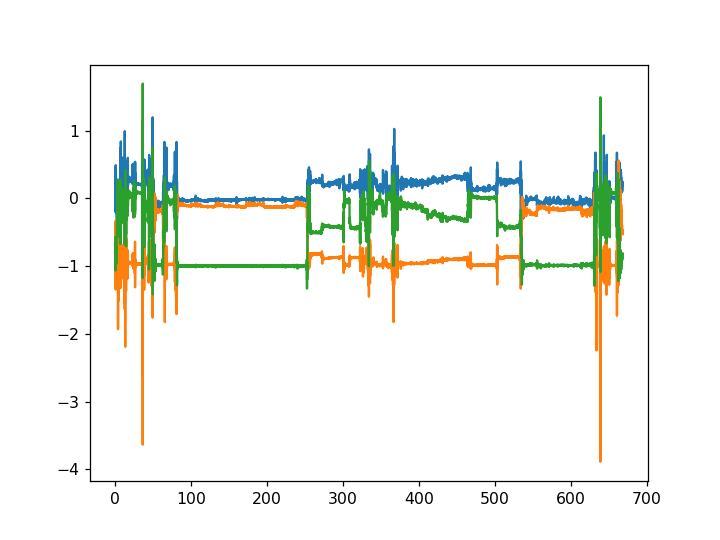

In [17]:
plt.plot(acc_interp)
plt.ylabel('Acceleration [g]')
plt.xlabel('Time [s]')

## Calculation of activity Counts

In [29]:
acc_interp_renamed=acc_interp.rename(columns = {'accelX(g)': 'Accx', 'accelY(g)': 'Accy','accelZ(g)':'Accz'}, inplace = False)
Act_count_phone=main(acc_interp_renamed,filesf=30)

In [30]:
Act_count_phone.head()

,axis1,axis2,axis3
0,31,52,109
1,35,14,22
2,79,112,128
3,47,89,74
4,13,15,13


<IPython.core.display.Javascript object>


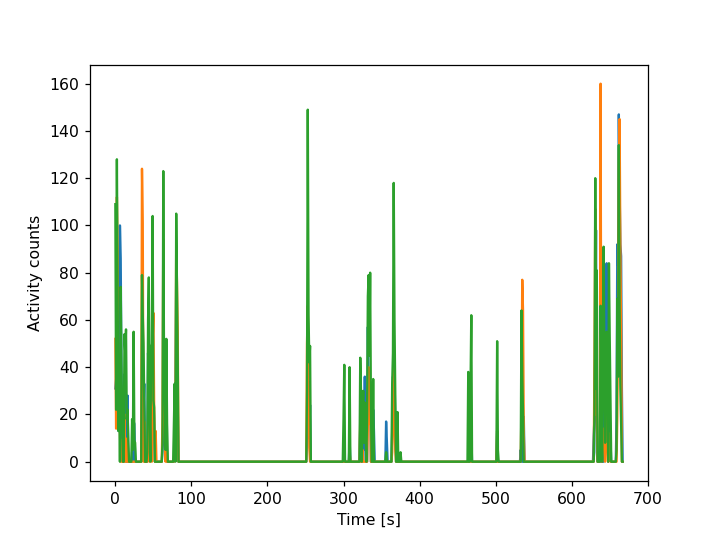

In [31]:
plt.figure()
plt.ylabel('Activity counts')
plt.xlabel('Time [s]')
plt.plot(Act_count_phone)

## Calculation of Vector Magnitude and total activity

In [32]:
vector_Magnitude=Calculate_vector_Magnitude(Act_count_phone)

<IPython.core.display.Javascript object>


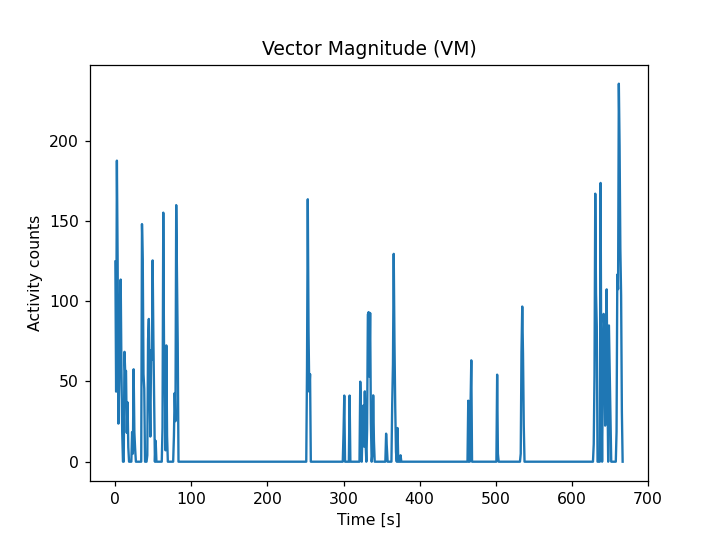

In [34]:
plt.figure()
plt.title('Vector Magnitude (VM)')
plt.ylabel('Activity counts')
plt.xlabel('Time [s]')
plt.plot(vector_Magnitude)

In [35]:
phone_total_activity= np.sum(vector_Magnitude>10)
print("the total activity recorded by the phone is %d"%phone_total_activity)

the total activity recorded by the phone is 106
